In [404]:
import xarray
import geopandas as gpd
import numpy as np
import pandas as pd
import s3fs
import geoglows

In [393]:
bucket_uri = 's3://geoglows-v2-retrospective/retrospective.zarr'
region_name = 'us-west-2'
s3 = s3fs.S3FileSystem(anon=True, client_kwargs=dict(region_name=region_name))
s3store = s3fs.S3Map(root=bucket_uri, s3=s3, check=False)

ds = xarray.open_zarr(s3store)

In [394]:
# linkno = 160221792 # for kenya_1GD03
# linkno = 160266239 # for rwanda_4326
# linkno = 160212492 # for grdc_1270900
# linkno = 160168155 # for grdc_1269200
#linkno = 160213625 # for grdc_1769050
#linkno = 160184420 # for grdc_1769100
# linkno = 160191425 # for grdc_1769200
#linkno = 160128354 # for grdc_1769150
#linkno = 160504154 # for grdc_1563680
linkno = 160528679 # for grdc_1563700
linkno = 160622096 # for grdc_1563900
linkno = 160590528 # for grdc_1563600
linkno = 160536792 # for grdc_1563450
linkno = 160596343 # for grdc_1563500
linkno = 160608077 # for grdc_1563550
linkno = 160553167 # for grdc_1563050

In [395]:
df = ds['Qout'].sel(rivid=linkno).to_dataframe()
df = df.reset_index().set_index('time').pivot(columns='rivid', values='Qout')

In [396]:
df = df[(df.index > '1950-12-31')]

In [397]:
df

rivid,160553167
time,
1951-01-01,1.335294
1951-01-02,1.288697
1951-01-03,1.241366
1951-01-04,1.195351
1951-01-05,1.153690
...,...
2024-07-26,5.400930
2024-07-27,10.995282
2024-07-28,6.809174


In [398]:
# gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/kenya_1GD03.csv")
# gauge = pd.read_csv("/Users/rachel1/Downloads/rwanda_4326.csv")
# gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1270900.csv")
# gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1269200.csv")
# gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1769050.csv")
# gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1769100.csv")
# gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1769200.csv")
# gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1769150.csv")
# gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1563680.csv")
gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1563700.csv")
gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1563900.csv")
gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1563600.csv")
gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1563450.csv")
gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1563500.csv")
gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1563550.csv")
gauge = pd.read_csv("/Users/rachel1/Downloads/rachel nile/grdc_1563050.csv")

In [399]:
gauge = gauge[gauge['Streamflow (m3/s)'] >= 0]
gauge

,Datetime,Streamflow (m3/s)
0,1978-01-01,0.0
1,1978-01-02,0.0
2,1978-01-03,0.0
3,1978-01-04,0.0
4,1978-01-05,0.0
...,...,...
1091,1980-12-27,0.0
1092,1980-12-28,0.0
1093,1980-12-29,0.0
1094,1980-12-30,0.0


In [402]:
# Assuming df1 has a Datetime column
gauge['Datetime'] = pd.to_datetime(gauge['Datetime'])
gauge.set_index('Datetime', inplace=True)
# Assuming df2 has a Datetime index
df.index = pd.to_datetime(df.index)

In [403]:
gauge

,Streamflow (m3/s)
Datetime,
1978-01-01,0.0
1978-01-02,0.0
1978-01-03,0.0
1978-01-04,0.0
1978-01-05,0.0
...,...
1980-12-27,0.0
1980-12-28,0.0
1980-12-29,0.0


In [405]:
bias_correct = geoglows.bias.correct_historical(df, gauge)

/Users/rachel1/miniconda3/envs/ecuador/lib/python3.9/site-packages/geoglows/bias.py:136: UserWarning:

The observational data has the same max and min value. You may get unanticipated results.



In [410]:
gauge.min()

Streamflow (m3/s)    0.0
dtype: float64

In [408]:
df.max()

rivid
160553167    65.011131
dtype: float32

In [406]:
bias_correct

,Corrected Simulated Streamflow
1951-01-01,1.111960
1951-01-02,1.111600
1951-01-03,1.111234
1951-01-04,1.110878
1951-01-05,1.110556
...,...
2024-07-26,0.603434
2024-07-27,3.820380
2024-07-28,0.928987
2024-07-29,0.100881


In [362]:
merged_df = pd.merge(gauge, df, left_on='Datetime', right_index=True, how='inner')

In [363]:
merged_df

,Datetime,Streamflow (m3/s),160504154
0,1978-01-01,0.0,0.799914
1,1978-01-02,0.0,0.653509
2,1978-01-03,0.0,0.583179
3,1978-01-04,0.0,0.557582
4,1978-01-05,0.0,0.536771
...,...,...,...
1091,1980-12-27,0.0,0.263302
1092,1980-12-28,0.0,0.263532
1093,1980-12-29,0.0,0.249981
1094,1980-12-30,0.0,0.234640


In [364]:
# Create a Boolean mask where "Streamflow (m3/s)" is less than 1
mask = merged_df['Streamflow (m3/s)'] < 1

# Count the occurrences
count_less_than_1 = mask.sum()

print("Number of occurrences where 'Streamflow (m3/s)' is less than 1:", count_less_than_1)

Number of occurrences where 'Streamflow (m3/s)' is less than 1: 731


In [365]:
# Create a Boolean mask where "Streamflow (m3/s)" is less than 1
mask = merged_df[linkno] < 1

# Count the occurrences
count_less_than_1 = mask.sum()

print("Number of occurrences where 'Streamflow (m3/s)' is less than 1:", count_less_than_1)

Number of occurrences where 'Streamflow (m3/s)' is less than 1: 282


In [366]:
merged_df = merged_df[merged_df['Streamflow (m3/s)'] > 0]
merged_df = merged_df[merged_df[linkno] > 0]

In [367]:
merged_df.columns

Index(['Datetime', 'Streamflow (m3/s)', 160504154], dtype='object')

In [368]:
def weibull_95th_percentile(column):
    # Sort the column values in ascending order
    sorted_values = column.sort_values()

    # Calculate the Weibull plotting positions
    n = len(sorted_values)
    weibull_positions = [(i + 1) / (n + 1) for i in range(n)]

    # Create a DataFrame with sorted values and Weibull positions
    weibull_df = pd.DataFrame({'Values': sorted_values, 'Weibull Position': weibull_positions})

    # Find the value corresponding to the 95th percentile (closest to 0.95)
    value_95th_percentile = weibull_df.loc[weibull_df['Weibull Position'] >= 0.05, 'Values'].iloc[0]

    return value_95th_percentile

# Calculate the 95th percentile for each column
Q95_gauge = weibull_95th_percentile(merged_df['Streamflow (m3/s)'])
Q95_geoglows = weibull_95th_percentile(merged_df[linkno])

print(f"95th percentile for 'Streamflow (m3/s)': {Q95_gauge}")
print(f"95th percentile for '160221792': {Q95_geoglows}")

95th percentile for 'Streamflow (m3/s)': 1.0
95th percentile for '160221792': 5.721791744232178


In [369]:
#exceedances_streamflow = (merged_df['Streamflow (m3/s)'] < Q95_gauge).sum()
exceedances_streamflow = merged_df[(merged_df['Streamflow (m3/s)'] <= Q95_gauge)]

In [390]:
exceedances_streamflow

,Datetime,Streamflow (m3/s),160504154,GAUGE_7Day_Avg,GEOGLOWS_7Day_Avg
291,1978-10-19,1.0,4.141653,1.0,15.057590
404,1979-02-09,1.0,3.844294,1.0,14.831098
510,1979-05-26,1.0,5.547673,1.0,14.806224
511,1979-05-27,1.0,2.315886,1.0,10.173005
840,1980-04-20,1.0,4.829660,1.0,8.262087
896,1980-06-15,1.0,7.795319,1.0,8.453738
897,1980-06-16,1.0,9.638327,1.0,8.769174
898,1980-06-17,1.0,11.659918,1.0,9.497647
900,1980-06-19,1.0,8.388013,1.0,10.018832
901,1980-06-20,1.0,9.922993,1.0,10.820427


In [371]:
#exceedances_160221792 = (merged_df[160221792] < Q95_geoglows).sum()
exceedances_160221792 = merged_df[(merged_df[linkno] <= Q95_geoglows)]

In [391]:
exceedances_160221792

,Datetime,Streamflow (m3/s),160504154,GAUGE_7Day_Avg,GEOGLOWS_7Day_Avg
538,1979-06-23,2.0,8.706210,1.142857,5.469267
539,1979-06-24,2.0,10.874031,1.285714,5.715474
1015,1980-10-12,1.0,3.493821,1.714286,5.519717
1016,1980-10-13,1.0,3.325642,1.571429,4.555990
1017,1980-10-14,1.0,3.179468,1.428571,3.799120
1018,1980-10-15,1.0,3.025347,1.285714,3.519808


In [373]:
count = merged_df[(merged_df['Streamflow (m3/s)'] <= Q95_gauge) & (merged_df[linkno] <= Q95_geoglows)].shape[0]

print(f"The number of times streamflow is less than Q95_gauge and geoglows is less than Q95_geoglows is: {count}")

The number of times streamflow is less than Q95_gauge and geoglows is less than Q95_geoglows is: 15


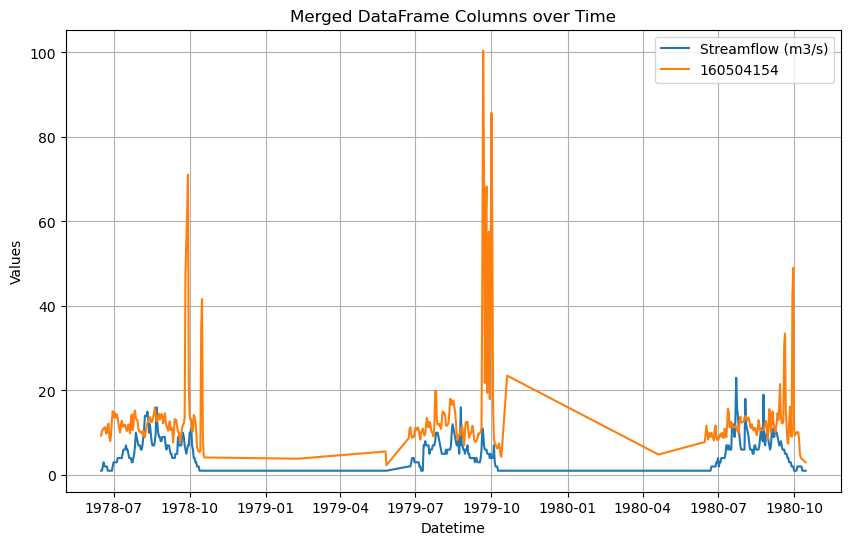

In [374]:
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame and it has a "Datetime" column
plt.figure(figsize=(10, 6))

# Plot each column in merged_df except "Datetime"
for column in merged_df.columns:
    if column != "Datetime":
        plt.plot(merged_df['Datetime'], merged_df[column], label=column)

plt.xlabel('Datetime')
plt.ylabel('Values')
plt.title('Merged DataFrame Columns over Time')
plt.legend()
plt.grid(True)
plt.show()


In [375]:
merged_df['GAUGE_7Day_Avg'] = merged_df['Streamflow (m3/s)'].rolling(window=7).mean()
merged_df['GEOGLOWS_7Day_Avg'] = merged_df[linkno].rolling(window=7).mean()


In [376]:
merged_df

,Datetime,Streamflow (m3/s),160504154,GAUGE_7Day_Avg,GEOGLOWS_7Day_Avg
166,1978-06-16,1.0,9.317058,NaN,NaN
167,1978-06-17,1.0,10.375706,NaN,NaN
168,1978-06-18,2.0,10.758689,NaN,NaN
169,1978-06-19,3.0,10.831696,NaN,NaN
170,1978-06-20,2.0,11.303539,NaN,NaN
...,...,...,...,...,...
1014,1980-10-11,1.0,3.671008,1.857143,6.476858
1015,1980-10-12,1.0,3.493821,1.714286,5.519717
1016,1980-10-13,1.0,3.325642,1.571429,4.555990
1017,1980-10-14,1.0,3.179468,1.428571,3.799120


In [377]:
exceedances_streamflow = merged_df[(merged_df['GAUGE_7Day_Avg'] <= Q95_gauge)]
exceedances_streamflow

,Datetime,Streamflow (m3/s),160504154,GAUGE_7Day_Avg,GEOGLOWS_7Day_Avg
291,1978-10-19,1.0,4.141653,1.0,15.057590
404,1979-02-09,1.0,3.844294,1.0,14.831098
510,1979-05-26,1.0,5.547673,1.0,14.806224
511,1979-05-27,1.0,2.315886,1.0,10.173005
840,1980-04-20,1.0,4.829660,1.0,8.262087
896,1980-06-15,1.0,7.795319,1.0,8.453738
897,1980-06-16,1.0,9.638327,1.0,8.769174
898,1980-06-17,1.0,11.659918,1.0,9.497647
900,1980-06-19,1.0,8.388013,1.0,10.018832
901,1980-06-20,1.0,9.922993,1.0,10.820427


In [378]:
exceedances_160221792 = merged_df[(merged_df['GEOGLOWS_7Day_Avg'] <= Q95_geoglows)]
exceedances_160221792

,Datetime,Streamflow (m3/s),160504154,GAUGE_7Day_Avg,GEOGLOWS_7Day_Avg
538,1979-06-23,2.0,8.706210,1.142857,5.469267
539,1979-06-24,2.0,10.874031,1.285714,5.715474
1015,1980-10-12,1.0,3.493821,1.714286,5.519717
1016,1980-10-13,1.0,3.325642,1.571429,4.555990
1017,1980-10-14,1.0,3.179468,1.428571,3.799120
1018,1980-10-15,1.0,3.025347,1.285714,3.519808


In [379]:
count = merged_df[(merged_df['GAUGE_7Day_Avg'] < Q95_gauge) & (merged_df['GEOGLOWS_7Day_Avg'] < Q95_geoglows)].shape[0]

print(f"The number of times streamflow is less than Q95_gauge and geoglows is less than Q95_geoglows is: {count}")

The number of times streamflow is less than Q95_gauge and geoglows is less than Q95_geoglows is: 0


In [380]:
def calculate_mape(observed, modeled):
    return abs((observed - modeled) / observed).mean() * 100

In [381]:
# Calculate MAPE for 'Streamflow (m3/s)' vs. column '160266239'
merged_df['MAPE_Streamflow_vs_160266239'] = abs((merged_df['Streamflow (m3/s)'] - merged_df[linkno]) / merged_df['Streamflow (m3/s)']) * 100

# Calculate MAPE for 'GAUGE_7Day_Avg' vs. 'GEOGLOWS_7Day_Avg'
merged_df['MAPE_GAUGE_vs_GEOGLOWS'] = abs((merged_df['GAUGE_7Day_Avg'] - merged_df['GEOGLOWS_7Day_Avg']) / merged_df['GAUGE_7Day_Avg']) * 100

merged_df

,Datetime,Streamflow (m3/s),160504154,GAUGE_7Day_Avg,GEOGLOWS_7Day_Avg,MAPE_Streamflow_vs_160266239,MAPE_GAUGE_vs_GEOGLOWS
166,1978-06-16,1.0,9.317058,NaN,NaN,831.705761,NaN
167,1978-06-17,1.0,10.375706,NaN,NaN,937.570572,NaN
168,1978-06-18,2.0,10.758689,NaN,NaN,437.934446,NaN
169,1978-06-19,3.0,10.831696,NaN,NaN,261.056519,NaN
170,1978-06-20,2.0,11.303539,NaN,NaN,465.176964,NaN
...,...,...,...,...,...,...,...
1014,1980-10-11,1.0,3.671008,1.857143,6.476858,267.100787,248.753911
1015,1980-10-12,1.0,3.493821,1.714286,5.519717,249.382114,221.983492
1016,1980-10-13,1.0,3.325642,1.571429,4.555990,232.564163,189.926620
1017,1980-10-14,1.0,3.179468,1.428571,3.799120,217.946792,165.938418


In [382]:
merged_df['MAPE_GAUGE_vs_GEOGLOWS'].mean()

234.38358856298584

In [383]:
merged_df['MAPE_Streamflow_vs_160266239'].mean()

259.71780036596203

In [384]:
filtered_df = merged_df[(merged_df['GAUGE_7Day_Avg'] < Q95_gauge) | (merged_df['GEOGLOWS_7Day_Avg'] < Q95_geoglows)]

In [385]:
filtered_df

,Datetime,Streamflow (m3/s),160504154,GAUGE_7Day_Avg,GEOGLOWS_7Day_Avg,MAPE_Streamflow_vs_160266239,MAPE_GAUGE_vs_GEOGLOWS
538,1979-06-23,2.0,8.706210,1.142857,5.469267,335.310507,378.560835
539,1979-06-24,2.0,10.874031,1.285714,5.715474,443.701553,344.536850
1015,1980-10-12,1.0,3.493821,1.714286,5.519717,249.382114,221.983492
1016,1980-10-13,1.0,3.325642,1.571429,4.555990,232.564163,189.926620
1017,1980-10-14,1.0,3.179468,1.428571,3.799120,217.946792,165.938418
1018,1980-10-15,1.0,3.025347,1.285714,3.519808,202.534652,173.762825


In [386]:
# Calculate MAPE for 'Streamflow (m3/s)' vs. column '160266239'
filtered_df['MAPE_Streamflow_vs_160266239'] = abs((filtered_df['Streamflow (m3/s)'] - filtered_df[linkno]) / filtered_df['Streamflow (m3/s)']) * 100

# Calculate MAPE for 'GAUGE_7Day_Avg' vs. 'GEOGLOWS_7Day_Avg'
filtered_df['MAPE_GAUGE_vs_GEOGLOWS'] = abs((filtered_df['GAUGE_7Day_Avg'] - filtered_df['GEOGLOWS_7Day_Avg']) / filtered_df['GAUGE_7Day_Avg']) * 100

/var/folders/7b/d70_71nx15l_shf2zfg77d3h0000gp/T/ipykernel_32026/2968493585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MAPE_Streamflow_vs_160266239'] = abs((filtered_df['Streamflow (m3/s)'] - filtered_df[linkno]) / filtered_df['Streamflow (m3/s)']) * 100
/var/folders/7b/d70_71nx15l_shf2zfg77d3h0000gp/T/ipykernel_32026/2968493585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MAPE_GAUGE_vs_GEOGLOWS'] = abs((filtered_df['GAUGE_7Day_Avg'] - filtered_df['GEOGLOWS_7Day_Avg

In [387]:
filtered_df

,Datetime,Streamflow (m3/s),160504154,GAUGE_7Day_Avg,GEOGLOWS_7Day_Avg,MAPE_Streamflow_vs_160266239,MAPE_GAUGE_vs_GEOGLOWS
538,1979-06-23,2.0,8.706210,1.142857,5.469267,335.310507,378.560835
539,1979-06-24,2.0,10.874031,1.285714,5.715474,443.701553,344.536850
1015,1980-10-12,1.0,3.493821,1.714286,5.519717,249.382114,221.983492
1016,1980-10-13,1.0,3.325642,1.571429,4.555990,232.564163,189.926620
1017,1980-10-14,1.0,3.179468,1.428571,3.799120,217.946792,165.938418
1018,1980-10-15,1.0,3.025347,1.285714,3.519808,202.534652,173.762825


In [388]:
filtered_df['MAPE_GAUGE_vs_GEOGLOWS'].mean()

245.7848400600029

In [389]:
filtered_df['MAPE_Streamflow_vs_160266239'].mean()

280.23996353149414